In [4]:
#INSTALL modules
!pip install sklearn
!pip install cycle


In [62]:
#import modules
import pandas as pd
import numpy as np

# part1 使用分类算法对传统价格技术指标进行训练
techniques indexes anlysis using methods of classifications

## Section1 data manipulation

In [74]:
#load the raw data
rawdata=pd.read_csv("rawdata.csv")
rawdata.head()
rawdata.describe()

,OPEN,CLOSE,HIGH,LOW,MEAN,MA1,MA5,MA20,VOLUME,MACD,RSI12,ROC,MTM,K,D,J,response
count,905.000000,905.000000,905.000000,905.000000,906.000000,906.000000,905.000000,905.000000,905.000000,905.000000,905.000000,905.000000,905.000000,905.000000,905.000000,905.000000,905.000000
mean,255.962652,256.025249,257.416851,254.543149,256.440232,256.046192,256.013249,255.945757,209550.262983,0.005193,49.610387,0.083403,0.099227,49.861337,49.961149,49.661768,0.004641
std,18.320537,18.275026,18.254676,18.308958,20.139474,18.277422,18.149616,17.703681,112758.506719,1.559793,13.039195,3.108907,7.842864,23.731121,20.961261,36.038136,2.327733
min,218.700000,218.150000,219.800000,216.800000,0.000000,218.150000,219.380000,222.920000,19310.000000,-3.930000,0.000000,-8.540000,-21.550000,7.420000,10.490000,-18.210000,-11.300000
25%,240.800000,240.650000,242.400000,239.500000,241.500000,240.650000,240.680000,240.950000,139772.000000,-1.100000,40.660000,-2.100000,-5.500000,27.870000,31.250000,17.630000,-1.400000
50%,257.500000,257.500000,258.700000,255.900000,257.980000,257.575000,257.990000,258.040000,186698.000000,0.040000,49.960000,0.130000,0.350000,49.390000,50.720000,48.910000,-0.050000
75%,269.350000,269.600000,271.000000,268.050000,270.350000,269.637500,269.510000,268.450000,252092.000000,1.040000,58.680000,1.960000,5.100000,71.300000,69.220000,82.200000,1.250000
max,296.950000,296.700000,297.700000,295.100000,297.200000,296.700000,294.760000,289.620000,997696.000000,4.420000,86.940000,9.880000,25.250000,93.550000,89.380000,122.740000,12.500000


In [75]:
#to check if price rises or falls in the next day,
#fill 1 when rising, fill 0 when falling
rawdata["dMean"]=rawdata["MEAN"].diff(1)
rawdata.ix[rawdata["dMean"]<0,"response"]=0
rawdata.ix[rawdata["dMean"]>0,"response"]=1

#fix small errors 
rawdata.ix[rawdata["response"]==-1.05,"response"]=0
rawdata.ix[rawdata["response"]==-0.4,"response"]=0
rawdata.ix[rawdata["response"]==0.05,"response"]=0
rawdata.ix[rawdata["response"]==0.6,"response"]=0

#rename the columns
rawdata.columns=["Time","OPEN","CLOSE","HIGH","LOW","MEAN","MA1","MA5","MA20","VOLUME",
                            "MACD","RSI12","ROC","MTM","K","D","J","response","dMean"]



#split the raw data to train_rawdata and test_rawdata, 
#then selecting the cols we need as test and training sets
train_rawdata=rawdata.ix[0:799,:]
test_rawdata=rawdata.ix[800:904,:]

train_features=train_rawdata.ix[:,["MA5","MA20","VOLUME","MACD","RSI12","ROC","MTM","K"]]
train_response=train_rawdata.ix[:,"response"]

test_features=test_rawdata.ix[:,["MA5","MA20","VOLUME","MACD","RSI12","ROC","MTM","K"]]
test_response=test_rawdata.ix[:,"response"]

In [76]:
#convert the response variable as categorical type
train_response=train_response.astype("category")
test_response=test_response.astype("category")

In [77]:
#normalised the train_features and test_features data
from sklearn import preprocessing
x = train_features.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
normalised_train_features = pd.DataFrame(x_scaled,columns=["MA5","MA20","VOLUME","MACD","RSI12","ROC","MTM","K"])


from sklearn import preprocessing
x2 = test_features.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x2_scaled = min_max_scaler.fit_transform(x2)
normalised_test_features = pd.DataFrame(x2_scaled,columns=["MA5","MA20","VOLUME","MACD","RSI12","ROC","MTM","K"])



In [78]:
#save the tables to local file for later use maybe
normalised_train_features.to_csv("normalised_train_features.csv")
normalised_test_features.to_csv("normalised_test_features.csv")
train_response.to_csv("train_response.csv")
test_response.to_csv("test_response.csv")

## section 2 CLassification Methods

### 2.1 logistic regression

In [79]:
# Logistic Regression
#np.random.seed()
from sklearn import metrics
from sklearn.linear_model import LogisticRegression

# fit a logistic regression model to the data
model_logist = LogisticRegression()
model_logist.fit(train_features ,train_response)
print(model_logist)

# make predictions
expected = test_response
predicted = model_logist.predict(test_features)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)


**MODEL EVALUATION**

             precision    recall  f1-score   support

        0.0       0.66      0.98      0.79        58
        1.0       0.94      0.36      0.52        47

avg / total       0.78      0.70      0.67       105

[[57  1]
 [30 17]]


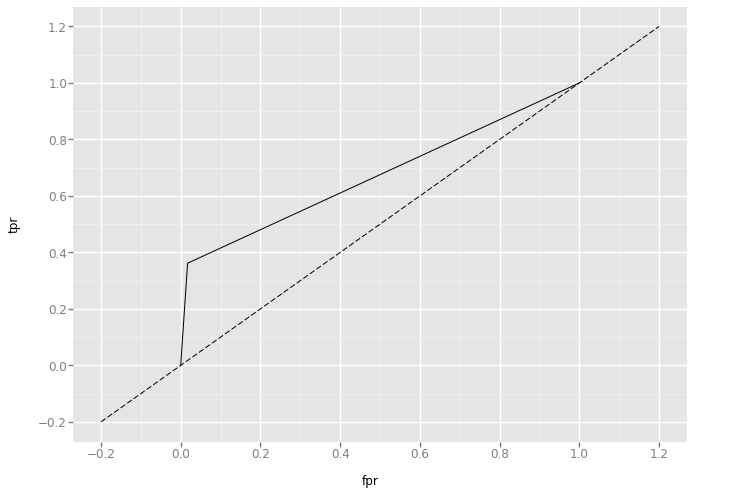

<ggplot: (282275961)>

In [80]:
# summarize the fit of the model
print(metrics.classification_report(expected, predicted))
print(metrics.confusion_matrix(expected, predicted))

#ROC curve
from ggplot import *
fpr, tpr, _ = metrics.roc_curve(expected, predicted)

df = pd.DataFrame(dict(fpr=fpr, tpr=tpr))

ggplot(df, aes(x='fpr', y='tpr')) +\
    geom_line() +\
    geom_abline(linetype='dashed')

### 2.2 Neural Networks

In [81]:
from sklearn.neural_network import MLPClassifier
# split into input (X) and output (Y) variables
X = train_features
Y = train_response
clf = MLPClassifier(activation='logistic',solver='lbfgs', alpha=1,
                    hidden_layer_sizes=(4, ), random_state=1)

clf.fit(X, Y)  
predicted_NN=clf.predict(test_features)

print(metrics.classification_report(expected, predicted_NN))
print(metrics.confusion_matrix(expected, predicted_NN))

             precision    recall  f1-score   support

        0.0       0.55      1.00      0.71        58
        1.0       0.00      0.00      0.00        47

avg / total       0.31      0.55      0.39       105

[[58  0]
 [47  0]]


### 2.3 SVM 

In [82]:
from sklearn import svm

X = train_features
Y = train_response
clf = svm.SVC()
clf.fit(X, Y) 
predicted_SVM=clf.predict(test_features)
print(metrics.classification_report(expected, predicted_SVM))
print(metrics.confusion_matrix(expected, predicted_SVM))

             precision    recall  f1-score   support

        0.0       0.55      1.00      0.71        58
        1.0       0.00      0.00      0.00        47

avg / total       0.31      0.55      0.39       105

[[58  0]
 [47  0]]
